In [686]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re

In [687]:
df=pd.read_csv('flipkart.csv')
df.head()

,Name,RAM,ROM,Extended_memory,Battery,Processor,Price
0,"POCO M3 (Power Black, 64 GB)",6 GB RAM,64 GB ROM,Expandable Upto 512 GB,6000 mAh,Qualcomm Snapdragon 662 Processor,"10,999"
1,"REDMI 9 Power (Electric Green, 64 GB)",4 GB RAM,64 GB ROM,NaN,6000 mAh,Qualcomm Snapdragon 662 Processor,"10,499"
2,"POCO M3 (Cool Blue, 64 GB)",6 GB RAM,64 GB ROM,Expandable Upto 512 GB,6000 mAh,Qualcomm Snapdragon 662 Processor,"10,999"
3,"LG W41 Pro (Laser Blue, 128 GB)",6 GB RAM,128 GB ROM,Expandable Upto 256 GB,5000 mAh,MediaTek Helio G35 Processor,"13,990"
4,"SAMSUNG Galaxy F41 (Fusion Blue, 128 GB)",6 GB RAM,128 GB ROM,Expandable Upto 512 GB,6000 mAh,Exynos 9611 Processor,"14,499"


In [688]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             984 non-null    object
 1   RAM              920 non-null    object
 2   ROM              982 non-null    object
 3   Extended_memory  663 non-null    object
 4   Battery          915 non-null    object
 5   Processor        870 non-null    object
 6   Price            984 non-null    object
dtypes: object(7)
memory usage: 27.0+ KB


In [689]:
df.isnull().sum()

Name                 0
RAM                 64
ROM                  2
Extended_memory    321
Battery             69
Processor          114
Price                0
dtype: int64

In [690]:
print(df['RAM'].unique())
print(df['ROM'].unique())
print(df['Extended_memory'].unique())

['6 GB RAM' '4 GB RAM' '8 GB RAM' '3 GB RAM' nan '12 GB RAM' '2 GB RAM'
 '1 GB RAM']
['64 GB ROM' '128 GB ROM' '32 GB ROM' '256 GB ROM' '512 GB ROM'
 '16 GB ROM' '8 GB ROM' '4 GB ROM' nan]
['Expandable Upto 512 GB' nan 'Expandable Upto 256 GB'
 'Expandable Upto 1 TB' 'Expandable Upto 128 GB' 'Expandable Upto 2 TB'
 'Expandable Upto 32 GB' 'Expandable Upto 64 GB' 'Expandable Upto 400 GB']


### Cleaning

In [691]:
# As extended memory is not mentioned, replacing it with value 0.

df['Extended_memory']=df['Extended_memory'].fillna('Expandable Upto 0 GB')

In [692]:
#Here we can see that the price column has comma, we have to remove this and convet it into integer.

df['Price']=df['Price'].str.replace(',','').astype(int)

In [693]:
#In columns like RAM,ROM and Battery some items are missing we have to drop these rows

df=df.dropna(subset= ['Processor','RAM','ROM','Battery'])

In [694]:
#Taking only the numerical value and converting it into integer 

df['Battery']=df['Battery'].str.split(' ').str.get(0).astype(int)

In [695]:
#Taking only the numerical value and converting it into integer 

df['RAM']=df['RAM'].str.split(' ').str.get(0).astype(int)

In [696]:
#Taking only the numerical value and converting it into integer 

df['ROM']=df['ROM'].str.split(' ').str.get(0).astype(int)

In [697]:
#Taking only the numerical value and converting it into integer 

df['Extended_memory']=df['Extended_memory'].str.split(' ').str.get(2).astype(int)

In [698]:
#In column Name removing the words in bracket because it may contains the same brand name but in bracket it mentions different colors of the mobile

name=[]
for i in df['Name']:
    i=re.sub(r"\([^()]*\)", "", i)
    i=i.strip()
    name.append(i)
df['Name']=name
len(df['Name'])

800

In [699]:
df.columns

Index(['Name', 'RAM', 'ROM', 'Extended_memory', 'Battery', 'Processor',
       'Price'],
      dtype='object')

In [701]:
df.Name

0                 POCO M3
1           REDMI 9 Power
2                 POCO M3
3              LG W41 Pro
4      SAMSUNG Galaxy F41
              ...        
979              ViVO Y11
980         REDMI 9 Prime
981    SAMSUNG Galaxy M02
982      Redmi Note 9 Pro
983                IQOO 3
Name: Name, Length: 800, dtype: object

In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 983
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             800 non-null    object
 1   RAM              800 non-null    int32 
 2   ROM              800 non-null    int32 
 3   Extended_memory  800 non-null    int32 
 4   Battery          800 non-null    int32 
 5   Processor        800 non-null    object
 6   Price            800 non-null    int32 
dtypes: int32(5), object(2)
memory usage: 28.1+ KB


In [703]:
name = df['Name'].value_counts(ascending=False)
name

REDMI Note 9           15
POCO M2 Pro            12
REDMI 9 Power          11
SAMSUNG Galaxy A21s    10
OPPO A3s                8
                       ..
realme 6 Pro            1
ViVO X50 Pro            1
ASUS Zenfone Selfie     1
ViVO Y50                1
OPPO A57                1
Name: Name, Length: 286, dtype: int64

In [704]:
#Here we can see that there are mobile with single data so we have to do dimensionality reduction

name1 = name[name<2]
len(name1)

90

In [705]:
#Here we are renaming the names with others which had only single data.

df.Name = df.Name.apply(lambda x: 'other' if x in name1 else x)

In [706]:
df.head()

,Name,RAM,ROM,Extended_memory,Battery,Processor,Price
0,POCO M3,6,64,512,6000,Qualcomm Snapdragon 662 Processor,10999
1,REDMI 9 Power,4,64,0,6000,Qualcomm Snapdragon 662 Processor,10499
2,POCO M3,6,64,512,6000,Qualcomm Snapdragon 662 Processor,10999
3,other,6,128,256,5000,MediaTek Helio G35 Processor,13990
4,SAMSUNG Galaxy F41,6,128,512,6000,Exynos 9611 Processor,14499


In [707]:
#We are droping the names that is others

df.drop(df[df['Name'] == 'other'].index, inplace = True)

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 983
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             710 non-null    object
 1   RAM              710 non-null    int32 
 2   ROM              710 non-null    int32 
 3   Extended_memory  710 non-null    int32 
 4   Battery          710 non-null    int32 
 5   Processor        710 non-null    object
 6   Price            710 non-null    int32 
dtypes: int32(5), object(2)
memory usage: 25.0+ KB


In [712]:
#Here the index value are not continuous because we drop some rows.

df=df.reset_index(drop=True)

In [713]:
df

,Name,RAM,ROM,Extended_memory,Battery,Processor,Price
0,POCO M3,6,64,512,6000,Qualcomm Snapdragon 662 Processor,10999
1,REDMI 9 Power,4,64,0,6000,Qualcomm Snapdragon 662 Processor,10499
2,POCO M3,6,64,512,6000,Qualcomm Snapdragon 662 Processor,10999
3,SAMSUNG Galaxy F41,6,128,512,6000,Exynos 9611 Processor,14499
4,POCO M3,6,128,512,6000,Qualcomm Snapdragon 662 Processor,11999
...,...,...,...,...,...,...,...
705,ViVO Y11,3,32,0,5000,SDM439 Processor,10929
706,REDMI 9 Prime,4,128,512,5020,MediaTek Helio G80 Processor,10999
707,SAMSUNG Galaxy M02,3,32,0,5000,MediaTek MT6739 Processor,11999
708,Redmi Note 9 Pro,4,128,512,5020,Qualcomm Snapdragon 720G Processor,13999


In [714]:
#Here we are storing the cleaned data.

df.to_csv('flipkart_mobile_detals.csv')

### Model


In [715]:
print(df['RAM'].unique())
print(df['ROM'].unique())
print(df['Extended_memory'].unique())
print(df['Battery'].unique())

[ 6  4  8  3 12  2]
[ 64 128 256  32  16 512]
[512   0   1 256 128   2 400]
[6000 5000 5200 5160 5020 4500 7000 4310 4230 4015 4000 4820 4200 4035
 4350 4100 4300 4800 3315 3765 4520 2730 4780 2400 3260 4440 4010 3000
 3010 3700 3060 4030 3200 3400 3500 3300 3360 3750 3340 3180 2630 2600
 2500]


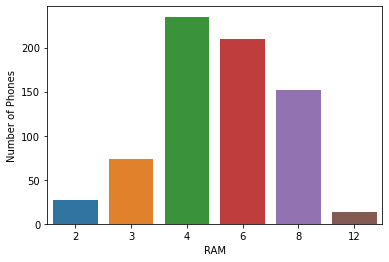

In [716]:
#Here we plot RAm to its count
sn.countplot(x='RAM',data=df)
plt.xlabel('RAM')
plt.ylabel('Number of Phones')
plt.show()

In [717]:
#Here we can see the price is increasing with RAM

df.groupby('RAM')['Price'].mean()

RAM
2     11762.111111
3     12097.561644
4     14949.834043
6     18334.704762
8     30346.421053
12    63689.923077
Name: Price, dtype: float64

<AxesSubplot:xlabel='RAM', ylabel='Price'>

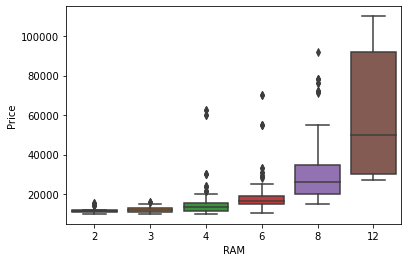

In [718]:
#Here we plot RAM and price, here we can see the average range of price for each RAM.
sn.boxplot(x='RAM',y='Price',data=df)

In [719]:
(df.Processor.unique())

array(['Qualcomm Snapdragon 662 Processor', 'Exynos 9611 Processor',
       'MediaTek Dimensity 700 MT6833 Processor',
       'MediaTek Helio G70 Processor',
       'Qualcomm Snapdragon 860 Processor',
       'MediaTek Helio G85 Processor',
       'Qualcomm Snapdragon 732G Processor', 'Exynos 850 Processor',
       'MediaTek Dimensity 700 Processor', 'MediaTek Helio G95 Processor',
       'MediaTek Dimensity 800U Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 678 Processor',
       'Samsung Exynos 9 Octa 9611 Processor',
       'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 460 Processor',
       'Qualcomm Snapdragon 750G octa core Processor',
       'Snapdragon 662 Processor', 'Exynos 9825 Processor',
       'MediaTek Helio P35 Processor',
       'MediaTek Helio P35 Octa Core Processor',
       'MediaTek Helio G25 Processor', 'MediaTek Helio G35 Processor',
       'MediaTek Helio P95 Processor',
       'MediaTek Dimensity 1200 Process

In [720]:
df.groupby('Processor')['Price'].mean()

Processor
20 GHz Qualcomm Snapdragon 660 AIE Processor                                         24766.000000
ARM Hisilicon Kirin 950  ARM Cortex A72  ARM Cortex A53 Octa Core 23GHz Processor    29999.333333
Exynos 2100 Processor                                                                86249.000000
Exynos 7570 Processor                                                                10946.500000
Exynos 7570 Quad Core 14GHz Processor                                                14000.000000
                                                                                         ...     
Snapdragon 460 Processor                                                             11989.000000
Snapdragon 662 Processor                                                             10999.000000
Snapdragon Processor                                                                 12998.500000
Spreadtrum QuadCore 15GHz Processor                                                  10480.000000
 Exynos 96

In [721]:

pd.pivot_table(df,index='RAM',values='Price')

,Price
RAM,
2,11762.111111
3,12097.561644
4,14949.834043
6,18334.704762
8,30346.421053
12,63689.923077


In [722]:
pd.pivot_table(df,index='Processor',values='Price')

,Price
Processor,
20 GHz Qualcomm Snapdragon 660 AIE Processor,24766.000000
ARM Hisilicon Kirin 950 ARM Cortex A72 ARM Cortex A53 Octa Core 23GHz Processor,29999.333333
Exynos 2100 Processor,86249.000000
Exynos 7570 Processor,10946.500000
Exynos 7570 Quad Core 14GHz Processor,14000.000000
...,...
Snapdragon 460 Processor,11989.000000
Snapdragon 662 Processor,10999.000000
Snapdragon Processor,12998.500000


In [723]:
(pd.pivot_table(df, index = ['RAM','Processor'], values = 'Price').sort_values('RAM', ascending = False))

Price
RAM Processor                                                  
12  Qualcomm Snapdragon 888 SM8350 Processor            57999.0
    Qualcomm Snapdragon 870 Processor                   49990.0
    Qualcomm Snapdragon 865 SM8250 Processor            49999.0
    Qualcomm Snapdragon 855 Processor                   26999.0
    MediaTek Dimensity 1200 Processor                   29999.0
...                                                         ...
2   Qualcomm Snapdragon 425 64bit Quad Core 14GHz P...  11092.5
    Qualcomm Snapdragon 430 Processor                   11990.0
    Qualcomm Snapdragon 450 Processor                   11500.0
    Spreadtrum QuadCore 15GHz Processor                 10480.0
    Exynos 7570 Processor                               10903.0

[194 rows x 1 columns]

In [724]:
df['Name'].value_counts()

REDMI Note 9           15
POCO M2 Pro            12
REDMI 9 Power          11
SAMSUNG Galaxy A21s    10
OPPO A3s                8
                       ..
ViVO X60                2
IQOO 3                  2
Tecno Camon i 2         2
Nokia 6.1               2
SAMSUNG Galaxy A70s     2
Name: Name, Length: 196, dtype: int64

In [725]:
pd.pivot_table(df, index = ['Name'], values = 'Price').sort_values('Price', ascending = False)

,Price
Name,
SAMSUNG Galaxy S21 Ultra,107332.333333
SAMSUNG Galaxy Note 20 Ultra 5G,91999.000000
SAMSUNG Galaxy S10,81500.000000
SAMSUNG Galaxy Note 20,77999.000000
SAMSUNG Galaxy S21 Plus,73599.000000
...,...
Nokia 2.4,10399.000000
Redmi Y3,10340.000000
SAMSUNG M02s,10294.500000


In [726]:
pd.pivot_table(df, index = ['Name','Processor'], values = 'Price').sort_values('Name', ascending = False)

Price
Name                Processor                                                  
realme X7 Pro 5G    MediaTek Dimensity 1000 Plus Processor              26999.0
realme X7 Max       MediaTek Dimensity 1200 Processor                   28199.0
realme X7 5G        MediaTek Dimensity 800U Processor                   18999.0
realme X3 SuperZoom Qualcomm Snapdragon 855 Processor                   25499.0
realme X3           Qualcomm Snapdragon 855 Processor                   25999.0
...                                                                         ...
GIONEE F103 Pro     Mediatek MT6735 Quad Core 13GHz Processor           10999.0
                    MT6735 Processor                                    10999.0
GIONEE A1           MediaTek MT6755 Helio P10 Octa Core 20GHz Proce...  18499.5
ASUS ROG Phone 5    Qualcomm Snapdragon 888 SM8350 Processor            53999.0
ASUS ROG Phone 3    Qualcomm Snapdragon 865 SM8250 Processor            45999.0

[202 rows x 1 columns]

In [727]:
len(names[names==1])


90

In [728]:
len(df['Name'].unique())

196

In [729]:
df.shape

(710, 7)

In [730]:
#Here we taking the independent features to variable x.
x=df.drop('Price',axis=1)


In [731]:
#Price is the dependent feature and we take price into variable y.
y=df['Price']


In [732]:
#spliting data into train and split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)

In [733]:
#importing r2_score to check the score of the model
from sklearn.metrics import r2_score

#Importing the machine learning algorithm that we are going to use here
from sklearn.ensemble import RandomForestClassifier

#For encoding the categirical value
from sklearn.preprocessing import OneHotEncoder

#Importing column transformer 
from sklearn.compose import make_column_transformer

#Importing pipeline to execute everything step by step
from sklearn.pipeline import make_pipeline

In [734]:
#Fitting categorical value
ohe=OneHotEncoder()
ohe.fit(x[['Name','Processor']])

OneHotEncoder()

In [735]:
#Using column transformer transforming mentioned columns and other column are passed 
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Processor']), remainder='passthrough')

In [736]:
ohe.categories_

[array(['ASUS ROG Phone 3', 'ASUS ROG Phone 5', 'GIONEE A1',
        'GIONEE F103 Pro', 'Honor 7A', 'Honor 7X', 'Honor 8', 'Honor 9N',
        'IQOO 3', 'Infinix Hot 10', 'Infinix Hot 10S', 'Infinix Note 10',
        'Infinix Note 10 Pro', 'Infinix Zero 8i', 'LG V30+',
        'LG Velvet Dual Screen', 'LG Wing', 'MOTOROLA G10 Power',
        'MOTOROLA G30', 'MOTOROLA G40 Fusion', 'MOTOROLA G60',
        'MOTOROLA G9 Power', 'Maplin Pro 5G', 'Mi 10', 'Mi 10T',
        'Mi 10T Pro', 'Mi 10i', 'Mi 11X', 'Mi 11X Pro 5G', 'Mi A2',
        'Mi A3', 'Micromax Dual 4', 'Micromax IN 1', 'Micromax IN Note 1',
        'Nokia 2.4', 'Nokia 3.4', 'Nokia 5', 'Nokia 5.1 Plus', 'Nokia 5.3',
        'Nokia 5.4', 'Nokia 6.1', 'OPPO A12', 'OPPO A15', 'OPPO A31',
        'OPPO A37f', 'OPPO A3s', 'OPPO A5', 'OPPO A52', 'OPPO A53',
        'OPPO A53s 5G', 'OPPO A54', 'OPPO A5s', 'OPPO A7', 'OPPO A71',
        'OPPO A83', 'OPPO F15', 'OPPO F17', 'OPPO F17 PRO', 'OPPO F17 Pro',
        'OPPO F19', 'OPPO F19 Pr

In [737]:
#creating model for the algorithm
forest = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)



In [738]:
#Passing values to pipeline
pipe=make_pipeline(column_trans,forest)

In [739]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ASUS ROG Phone 3', 'ASUS ROG Phone 5', 'GIONEE A1',
       'GIONEE F103 Pro', 'Honor 7A', 'Honor 7X', 'Honor 8', 'Honor 9N',
       'IQOO 3', 'Infinix Hot 10', 'Infinix Hot 10S', 'Infinix Note 10',
       'Infinix Note 10 Pro', 'Infinix Zero 8i', 'LG V30+',
       'LG Velvet D...
       'SDM439 Processor', 'Samsung Exynos 9 Octa 9611 Processor',
       'Snapdragon 435 Processor', 'Snapdragon 460 Processor',
       'Snapdragon 662 Processor', 'Snapdragon Processor',
       'Spreadtrum QuadCore 15GHz Processor',
       '\xa0Exynos 9611Octa Core processor Processor'], dtype=object)]),
                                                  ['Name', 'Processor'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(cr

In [740]:
y_pred=pipe.predict(xtest)

In [741]:
r2_score(ytest,y_pred)

0.9861306641740749

In [743]:
pipe.predict(pd.DataFrame(columns=xtest.columns,data=np.array(['POCO M3', 4, 64, 256, 5000, 'Qualcomm Snapdragon 662 Processor']).reshape(1,6)))

array([11999])

In [744]:
import pickle

In [745]:
pickle.dump(pipe,open('flipkart_price_prediction.pkl','wb'))